# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Aid Fawwaz
- **Email:** fawwazaid@gmail.com
- **ID Dicoding:** -

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penyewaan sepeda sepanjang tahun? Apakah ada pola musiman?
- Pada jam berapa permintaan sepeda paling tinggi? Apakah berbeda antara hari kerja dan akhir pekan?
- Apakah pengaruh cuaca menyebabkan penurunan dalam penyewaan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
df_day = pd.read_csv("./data/archive/day.csv", )

In [3]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
print(f"Shape: {df_day.shape[0]} rows × {df_day.shape[1]} columns\n")

Shape: 731 rows × 16 columns



In [5]:
df_hour = pd.read_csv("./data/archive/hour.csv")

In [6]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [7]:
print(f"Shape: {df_hour.shape[0]} rows × {df_hour.shape[1]} columns\n")

Shape: 17379 rows × 17 columns



**Insight:**
- Dataset terdiri dari dua file.
- Dataset df_day terdiri dari 731 baris dan 16 kolom.
- Dataset df_hour terdiri dari 17379 baris dan 17 kolom.
- Semua kolom pada kedua dataset memiliki nama yang sama, kecuali kolom hr pada dataset df_hour.

### Assessing Data

Pada tahap ini, kita akan mengecek kesehatan data yang meliputi jumlah kolom dan baris, tipe data, nilai yang hilang (missing values), data duplikat, serta statistik deskriptif dari dataset.

In [8]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

def data_assessment(df):
    # 1️⃣ Basic Info
    print("="*60)
    print("📋 DATA INFORMATION")
    print("="*60)
    df.info()

    # 2️⃣ Data Types Summary
    print("\n" + "="*60)
    print("📚 DATA TYPES SUMMARY")
    print("="*60)
    print(df.dtypes.value_counts())

    # 3️⃣ Missing Values
    print("\n" + "="*60)
    print("🔍 MISSING VALUES (NaN)")
    print("="*60)
    missing = df.isna().sum()
    print(missing[missing > 0] if missing.sum() > 0 else "✅ Tidak ada data yang hilang (no missing values).")

    # 4️⃣ Duplicates
    print("\n" + "="*60)
    print("📦 DUPLICATE DATA")
    print("="*60)
    print("Jumlah duplikasi:", df.duplicated().sum())

    # 5️⃣ Descriptive Statistics
    print("\n" + "="*60)
    print("📊 DESCRIPTIVE STATISTICS (Numerical Columns)")
    print("="*60)
    desc = df.describe().T
    median = df.median(numeric_only=True)
    mode = df.mode(numeric_only=True).iloc[0]
    desc.insert(2, "median", median)
    desc.insert(3, "mode", mode)
    print(desc)

#### Assessing Data df_day

In [9]:
data_assessment(df_day)

📋 DATA INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB

📚 DATA TYPES SUMMARY
int64      11
float64     4
object      1
Name: coun

- Dataset df_day terdiri dari 16 kolom dengan data kuantitatif.
- Pada dataset df_day, tidak terdapat missing values dan duplikasi data.
- Terdapat data bertipe object pada kolom dtime.

In [10]:
df_day['instant'].head(5)

0    1
1    2
2    3
3    4
4    5
Name: instant, dtype: int64

Kolom instant hanya berisi nomor urut data.

In [11]:
df_day['dteday'].head(5)

0    2011-01-01
1    2011-01-02
2    2011-01-03
3    2011-01-04
4    2011-01-05
Name: dteday, dtype: object

Disini kita dapatkan perbedaan waktu pada kolom dteday konstan di 1 hari.

In [12]:
df_day['dteday'].min(), df_day['dteday'].max()

('2011-01-01', '2012-12-31')

Kolom dteday mewakili rentang waktu dataset yang digunakan, yaitu dari 1 Januari 2012 hingga 31 Desember 2012. Selain mengubah format ke datetime kita juga dapat memecah kolom dteday menjadi tahun, bulan, dan minggu.

In [13]:
df_day['season'].value_counts().sort_index()

season
1    181
2    184
3    188
4    178
Name: count, dtype: int64

Kolom season trerdiri dari 4 season.

In [14]:
df_day['yr'].value_counts().sort_index()

yr
0    365
1    366
Name: count, dtype: int64

Kolom year terdiri dari tahun dengan 365 dan 366 hari.

In [15]:
df_day['mnth'].value_counts().sort_index()

mnth
1     62
2     57
3     62
4     60
5     62
6     60
7     62
8     62
9     60
10    62
11    60
12    62
Name: count, dtype: int64

Kolom mnth terdiri dari 12 bulan.

In [16]:
df_day['holiday'].value_counts().sort_index()

holiday
0    710
1     21
Name: count, dtype: int64

Kolom holiday berjenis boolean, holiday atau tidak holiday.

In [17]:
df_day['weekday'].value_counts().sort_index()

weekday
0    105
1    105
2    104
3    104
4    104
5    104
6    105
Name: count, dtype: int64

Kolom weekday terdiri dari 7 hari.

In [18]:
df_day['workingday'].value_counts().sort_index()

workingday
0    231
1    500
Name: count, dtype: int64

Kolom workingday berjenis boolean, working day atau tidak working day

In [19]:
pd.crosstab(df_day['holiday'], df_day['workingday'])

workingday,0,1
holiday,,
0,210,500
1,21,0


Jika kita lihat tabel irisan pada kolom holiday dan workingday, ada 210 hari yang bukan hari libur dan bukan hari kerja, 500 hari yang bukan hari libur dan hari kerja, 21 hari yang hari libur dan bukan hari kerja, dan 0 hari yang hari libur dan hari kerja.

In [20]:
cross_weekday_workingday = pd.crosstab(df_day['weekday'], df_day['workingday'])
cross_weekday_workingday.index = cross_weekday_workingday.index +1
cross_weekday_workingday

workingday,0,1
weekday,,
1,105,0
2,15,90
3,1,103
4,1,103
5,2,102
6,2,102
7,105,0


Jika kita lihat tabel irisan pada kolom weekday dan workingday, sepertinya baris weekday no 1 dan 7 merupakan weekend.

In [21]:
cross_weekday_holiday = pd.crosstab(df_day['weekday'], df_day['holiday'])
cross_weekday_holiday.index = cross_weekday_holiday.index +1
cross_weekday_holiday

holiday,0,1
weekday,,
1,105,0
2,90,15
3,103,1
4,103,1
5,102,2
6,102,2
7,105,0


Jika kita lihat tabel irisan pada kolom weekday dan holiday, holiday pada weekday terbanyak ada pada weekday baris ke-2.

In [22]:
df_day['weathersit'].value_counts().sort_index()

weathersit
1    463
2    247
3     21
Name: count, dtype: int64

| Kode  | Keterangan              | Deskripsi cuaca                                                  |
| ----- | ----------------------- | ---------------------------------------------------------------- |
| **1** | Clear / Few clouds      | Cerah, berawan sebagian, langit sebagian tertutup awan           |
| **2** | Mist + Cloudy           | Berkabut, berawan, atau sedikit hujan ringan                     |
| **3** | Light Snow / Light Rain | Salju ringan, hujan ringan, atau badai petir ringan              |
| **4** | Heavy Rain / Snow       | Hujan lebat, salju lebat, badai besar (jarang muncul di dataset) |


Kolom weathersit terdiri dari 3 unik data 1, 2, 3, 4 yang berisi klasifikasi terkait cuaca.

In [23]:
df_day['temp'].describe()

count    731.000000
mean       0.495385
std        0.183051
min        0.059130
25%        0.337083
50%        0.498333
75%        0.655417
max        0.861667
Name: temp, dtype: float64

Kolom temp berisi data suhu yang sudah dinormalisasi 0-1, dengan rentang nilai 0.05 - 0.86.

In [24]:
df_day['atemp'].describe()

count    731.000000
mean       0.474354
std        0.162961
min        0.079070
25%        0.337842
50%        0.486733
75%        0.608602
max        0.840896
Name: atemp, dtype: float64

Kolom atemp berisi data suhu yang sudah dinormalisasi 0-1, dengan rentang nilai 0.07 - 0.84.

In [25]:
df_day['hum'].describe()

count    731.000000
mean       0.627894
std        0.142429
min        0.000000
25%        0.520000
50%        0.626667
75%        0.730209
max        0.972500
Name: hum, dtype: float64

Kolom hum berisi data kelembapan yang sudah dinormalisasi 0-1, dengan rentang nilai 0.00 - 0.97.

In [26]:
df_day['windspeed'].describe()

count    731.000000
mean       0.190486
std        0.077498
min        0.022392
25%        0.134950
50%        0.180975
75%        0.233214
max        0.507463
Name: windspeed, dtype: float64

Kolom windspeed berisi data kecepatan angin yang sudah dinormalisasi 0-1, dengan rentang nilai 0.02 - 0.50.

In [27]:
df_day['casual'].head(5)

0    331
1    131
2    120
3    108
4     82
Name: casual, dtype: int64

Kolom casual berisi data harian pengguna bike sharing yang tidak terdaftar.

In [28]:
df_day['registered'].head(5)

0     654
1     670
2    1229
3    1454
4    1518
Name: registered, dtype: int64

Kolom registeres berisi data harian pengguna bike sharing yang terdaftar.

In [29]:
df_day[['casual', 'registered', 'cnt']].head()


,casual,registered,cnt
0,331,654,985
1,131,670,801
2,120,1229,1349
3,108,1454,1562
4,82,1518,1600


Jika kita mencermati table diatas, dapat disimpulkan bahwa kolom cnt merupakan jumlah dari kolom casual dan register.

Berikutnya kita akan melakukan assessment terhadap dataset df_hour.

#### Assessing Data df_hour

In [30]:
data_assessment(df_hour)

📋 DATA INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB

📚 DATA TYPES SUMMARY
int64   

- Dataset df_hour terdiri dari 17 kolom.
- Pada dataset df_hour, tidak terdapat missing values dan duplikasi data.
- Terdapat data bertipe object pada kolom dtime.

In [31]:
df_hour['instant'].head(5)

0    1
1    2
2    3
3    4
4    5
Name: instant, dtype: int64

Kolom instant hanya berisi nomor urut data.

In [32]:
df_hour['dteday'].head(5)

0    2011-01-01
1    2011-01-01
2    2011-01-01
3    2011-01-01
4    2011-01-01
Name: dteday, dtype: object

Disini kita dapatkan perbedaan waktu pada kolom dteday tidak konstan di 1 hari, tergantung jamnya.

In [33]:
df_hour['dteday'].min(), df_hour['dteday'].max()

('2011-01-01', '2012-12-31')

Kolom dteday mewakili rentang waktu dataset yang digunakan, yaitu dari 1 Januari 2011 hingga 31 Desember 2012. Kita juga dapat memecah kolom dteday menjadi tahun, bulan, dan minggu.

In [34]:
df_hour['season'].value_counts().sort_index()

season
1    4242
2    4409
3    4496
4    4232
Name: count, dtype: int64

Kolom season trerdiri dari 4 season.

In [35]:
df_hour['yr'].value_counts().sort_index()

yr
0    8645
1    8734
Name: count, dtype: int64

Kolom year terdiri dari tahun dengan 8645 dan 8734 hari.

In [36]:
df_hour['mnth'].value_counts().sort_index()

mnth
1     1429
2     1341
3     1473
4     1437
5     1488
6     1440
7     1488
8     1475
9     1437
10    1451
11    1437
12    1483
Name: count, dtype: int64

Kolom mnth terdiri dari 12 bulan.

In [37]:
df_hour['hr'].value_counts().sort_index()

hr
0     726
1     724
2     715
3     697
4     697
5     717
6     725
7     727
8     727
9     727
10    727
11    727
12    728
13    729
14    729
15    729
16    730
17    730
18    728
19    728
20    728
21    728
22    728
23    728
Name: count, dtype: int64

In [38]:
df_hour['hr'].describe()

count    17379.000000
mean        11.546752
std          6.914405
min          0.000000
25%          6.000000
50%         12.000000
75%         18.000000
max         23.000000
Name: hr, dtype: float64

Kolom hr terdiri dari 24 baris yang menyatakan 24 jam.

In [39]:
df_hour['holiday'].value_counts().sort_index()

holiday
0    16879
1      500
Name: count, dtype: int64

Kolom holiday berjenis boolean, holiday atau tidak holiday.

In [40]:
df_hour['weekday'].value_counts().sort_index()

weekday
0    2502
1    2479
2    2453
3    2475
4    2471
5    2487
6    2512
Name: count, dtype: int64

Kolom weekday terdiri dari 7 hari.

In [41]:
df_hour['workingday'].value_counts().sort_index()

workingday
0     5514
1    11865
Name: count, dtype: int64

Kolom workingday berjenis boolean, working day atau tidak working day

In [42]:
pd.crosstab(df_hour['holiday'], df_hour['workingday'])

workingday,0,1
holiday,,
0,5014,11865
1,500,0


Jika kita lihat tabel irisan pada kolom holiday dan workingday, ada 5014 jam yang bukan hari libur dan bukan hari kerja, 11865 jam yang bukan hari libur dan hari kerja, 500 jam yang hari libur dan bukan hari kerja, dan 0 hari yang hari libur dan hari kerja.

In [43]:
cross_hour_weekday_workingday = pd.crosstab(df_hour['weekday'], df_hour['workingday'])
cross_hour_weekday_workingday.index = cross_hour_weekday_workingday.index +1
cross_hour_weekday_workingday

workingday,0,1
weekday,,
1,2502,0
2,357,2122
3,23,2430
4,24,2451
5,48,2423
6,48,2439
7,2512,0


Jika kita lihat tabel irisan pada kolom weekday dan workingday, sepertinya baris weekday no 1 dan 7 merupakan weekend.

In [44]:
cross_hour_weekday_holiday = pd.crosstab(df_hour['weekday'], df_hour['holiday'])
cross_hour_weekday_holiday.index = cross_hour_weekday_holiday.index +1
cross_hour_weekday_holiday

holiday,0,1
weekday,,
1,2502,0
2,2122,357
3,2430,23
4,2451,24
5,2423,48
6,2439,48
7,2512,0


Jika kita lihat tabel irisan pada kolom weekday dan holiday, holiday pada weekday terbanyak ada pada weekday baris ke-2.

In [45]:
df_hour['weathersit'].value_counts().sort_index()

weathersit
1    11413
2     4544
3     1419
4        3
Name: count, dtype: int64

| Kode  | Keterangan              | Deskripsi cuaca                                                  |
| ----- | ----------------------- | ---------------------------------------------------------------- |
| **1** | Clear / Few clouds      | Cerah, berawan sebagian, langit sebagian tertutup awan           |
| **2** | Mist + Cloudy           | Berkabut, berawan, atau sedikit hujan ringan                     |
| **3** | Light Snow / Light Rain | Salju ringan, hujan ringan, atau badai petir ringan              |
| **4** | Heavy Rain / Snow       | Hujan lebat, salju lebat, badai besar (jarang muncul di dataset) |


Kolom weathersit terdiri dari 3 unik data 1, 2, 3, 4 yang berisi klasifikasi terkait cuaca.

In [46]:
df_hour['temp'].describe()

count    17379.000000
mean         0.496987
std          0.192556
min          0.020000
25%          0.340000
50%          0.500000
75%          0.660000
max          1.000000
Name: temp, dtype: float64

Kolom temp berisi data suhu yang sudah dinormalisasi 0-1, dengan rentang nilai 0.02 - 1.00.

In [47]:
df_hour['atemp'].describe()

count    17379.000000
mean         0.475775
std          0.171850
min          0.000000
25%          0.333300
50%          0.484800
75%          0.621200
max          1.000000
Name: atemp, dtype: float64

Kolom atemp berisi data suhu yang sudah dinormalisasi 0-1, dengan rentang nilai 0.00 - 1.00.

In [48]:
df_hour['hum'].describe()

count    17379.000000
mean         0.627229
std          0.192930
min          0.000000
25%          0.480000
50%          0.630000
75%          0.780000
max          1.000000
Name: hum, dtype: float64

Kolom hum berisi data kelembapan yang sudah dinormalisasi 0-1, dengan rentang nilai 0.00 - 1.00.

In [49]:
df_hour['windspeed'].describe()

count    17379.000000
mean         0.190098
std          0.122340
min          0.000000
25%          0.104500
50%          0.194000
75%          0.253700
max          0.850700
Name: windspeed, dtype: float64

Kolom windspeed berisi data kecepatan angin yang sudah dinormalisasi 0-1, dengan rentang nilai 0.00 - 0.85.

In [50]:
df_hour['casual'].head(5)

0    3
1    8
2    5
3    3
4    0
Name: casual, dtype: int64

Kolom casual berisi data harian pengguna bike sharing yang tidak terdaftar.

In [51]:
df_hour['registered'].head(5)

0    13
1    32
2    27
3    10
4     1
Name: registered, dtype: int64

Kolom registeres berisi data harian pengguna bike sharing yang terdaftar.

In [52]:
df_hour[['casual', 'registered', 'cnt']].head()


,casual,registered,cnt
0,3,13,16
1,8,32,40
2,5,27,32
3,3,10,13
4,0,1,1


Jika kita mencermati table diatas, dapat disimpulkan bahwa kolom cnt merupakan jumlah dari kolom casual dan register.

**Insight:**
- Kedua dataset termasuk time series dataset, karena memiliki komponen waktu pada salah satu kolomnya.
- data bersifat berurutan dari 1 Januari 2011 - 31 Desember 2012.
- Tidak terdapat missing values dan duplikasi data.
- Kedua dataset memliki kolom yang sama kecuali kolom hr pada dataset df_hour, sehingga memungkinkan untuk menggabung kedua dataset jika diperlukan.
- Kolom dteday, dapat diubah menjadi datetime, dan dapat dipecah menjadi tahun, bulan, dan hari.
- Kolom season dapat diubah menjadi nama musim.
- Kolom year dapat diubah menjadi tahun 2011 dan 2012.
- Kolom weathersit, memiliki diterangai memiliki hubungan dengan kolom temp, atemp, hum dan windspeed.
- Kolom weathershit dapat diubah sesuai kategori namanya.
- Kolon cnt adalah jumlah dari kolom register dan casual.

### Cleaning Data

Setelah dilakukan pengecekan, tidak terdapat duplikasi maupun data yang hilang pada dataset. Tetapi kita masih dapat melakukan penambahan kualitas data, seperti mengubah tipe data, menambah beberapa kolom baru, dan menggabungkan kedua dataset.

In [53]:
d

NameError: name 'd' is not defined

In [ ]:
df_all = df_hour.merge(df_day, on='dteday', how='inner', suffixes=('_hour', '_day'))

In [ ]:
df_all['dteday'] = pd.to_datetime(df_all['dteday'])
df_all['dteday'].dtype

In [ ]:
df_all['dteday'].head()

In [ ]:
df_all.info()

In [ ]:
df_all['year'] = df_all['dteday'].dt.year
df_all['month'] = df_all['dteday'].dt.month
df_all['day'] = df_all['dteday'].dt.day
df_all['day_name'] = df_all['dteday'].dt.day_name()
df_all['week'] = df_all['dteday'].dt.isocalendar().week
#df_all[['dteday', 'holiday', 'workingday', 'weekday', 'year', 'month', 'day', 'day_name', 'week']].head()

In [ ]:
f

In [ ]:
df_day.head()

In [ ]:
df_day.info()

In [54]:
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

Kolom dteday diubah menjadi tipe datetime.

In [55]:
df_day['season'] = df_day['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
df_hour['season'] = df_hour['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

Mengganti kolom season dengan nama- nama musim.

In [59]:
weather_map = {
    1: 'Clear',
    2: 'Misty',
    3: 'Light_rainsnow',
    4: 'Heavy_rainsnow'
}

df_day['weathersit'] = df_day['weathersit'].replace(weather_map)
df_hour['weathersit'] = df_hour['weathersit'].replace(weather_map)

Mengganti kolom wheatersit menjadi lebih deskriptif.

In [60]:
df_day['year'] = df_day['dteday'].dt.year
df_day['month'] = df_day['dteday'].dt.month
df_day['day'] = df_day['dteday'].dt.day
df_day['day_name'] = df_day['dteday'].dt.day_name()
df_day['week'] = df_day['dteday'].dt.isocalendar().week
df_day[['dteday', 'holiday', 'workingday', 'weekday', 'year', 'month', 'day', 'day_name', 'week']].head()

,dteday,holiday,workingday,weekday,year,month,day,day_name,week
0,2011-01-01,0,0,6,2011,1,1,Saturday,52
1,2011-01-02,0,0,0,2011,1,2,Sunday,52
2,2011-01-03,0,1,1,2011,1,3,Monday,1
3,2011-01-04,0,1,2,2011,1,4,Tuesday,1
4,2011-01-05,0,1,3,2011,1,5,Wednesday,1


In [61]:
df_hour['year'] = df_hour['dteday'].dt.year
df_hour['month'] = df_hour['dteday'].dt.month
df_hour['day'] = df_hour['dteday'].dt.day
df_hour['day_name'] = df_hour['dteday'].dt.day_name()
df_hour['week'] = df_hour['dteday'].dt.isocalendar().week
df_hour[['dteday', 'holiday', 'workingday', 'weekday', 'year', 'month', 'day', 'hr', 'day_name', 'week']].head()

,dteday,holiday,workingday,weekday,year,month,day,hr,day_name,week
0,2011-01-01,0,0,6,2011,1,1,0,Saturday,52
1,2011-01-01,0,0,6,2011,1,1,1,Saturday,52
2,2011-01-01,0,0,6,2011,1,1,2,Saturday,52
3,2011-01-01,0,0,6,2011,1,1,3,Saturday,52
4,2011-01-01,0,0,6,2011,1,1,4,Saturday,52


Disini kita memecah kolom dteday menjadi beberapa kolom, seperti tahun, bulan, minggu, dan hari.

In [62]:
def get_category_days(day_name):
    if day_name in ["Saturday", "Sunday"]:
        return "weekend"
    else: 
        return "weekdays"

In [68]:
df_day["category_days"] = df_day["day_name"].apply(get_category_days)
df_hour["category_days"] = df_hour["day_name"].apply(get_category_days)

Penambahan kolom kategori hari untuk menjawab pertanyaan bisnis.

In [69]:
df_day.drop(['instant', 'yr', 'mnth', 'weekday', 'workingday'], axis = 1, inplace= True)
df_hour.drop(['instant', 'yr', 'mnth', 'weekday', 'workingday'], axis = 1, inplace= True)

KeyError: "['instant', 'yr', 'mnth', 'weekday', 'workingday'] not found in axis"

Penghapusan kolom yang tidak digunakan

In [70]:
columns = ['season', 'weathersit', 'day_name', 'category_days']
 
for column in columns:
    df_day[column] =  df_day[column].astype("category")
    df_hour[column] =  df_hour[column].astype("category")

Kolom dengan data kategorikal diubah menjadi tipe kategori.

In [71]:
df_day.head()

,dteday,season,holiday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month,day,day_name,week,category_days
0,2011-01-01,Spring,0,Misty,0.344167,0.363625,0.805833,0.160446,331,654,985,2011,1,1,Saturday,52,weekend
1,2011-01-02,Spring,0,Misty,0.363478,0.353739,0.696087,0.248539,131,670,801,2011,1,2,Sunday,52,weekend
2,2011-01-03,Spring,0,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349,2011,1,3,Monday,1,weekdays
3,2011-01-04,Spring,0,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562,2011,1,4,Tuesday,1,weekdays
4,2011-01-05,Spring,0,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600,2011,1,5,Wednesday,1,weekdays


In [72]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   dteday         731 non-null    datetime64[ns]
 1   season         731 non-null    category      
 2   holiday        731 non-null    int64         
 3   weathersit     731 non-null    category      
 4   temp           731 non-null    float64       
 5   atemp          731 non-null    float64       
 6   hum            731 non-null    float64       
 7   windspeed      731 non-null    float64       
 8   casual         731 non-null    int64         
 9   registered     731 non-null    int64         
 10  cnt            731 non-null    int64         
 11  year           731 non-null    int32         
 12  month          731 non-null    int32         
 13  day            731 non-null    int32         
 14  day_name       731 non-null    category      
 15  week           731 non-

In [73]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month,day,day_name,week,category_days
0,1,2011-01-01,Spring,0,1,0,0,6,0,Clear,0.24,0.2879,0.81,0.0,3,13,16,2011,1,1,Saturday,52,weekend
1,2,2011-01-01,Spring,0,1,1,0,6,0,Clear,0.22,0.2727,0.80,0.0,8,32,40,2011,1,1,Saturday,52,weekend
2,3,2011-01-01,Spring,0,1,2,0,6,0,Clear,0.22,0.2727,0.80,0.0,5,27,32,2011,1,1,Saturday,52,weekend
3,4,2011-01-01,Spring,0,1,3,0,6,0,Clear,0.24,0.2879,0.75,0.0,3,10,13,2011,1,1,Saturday,52,weekend
4,5,2011-01-01,Spring,0,1,4,0,6,0,Clear,0.24,0.2879,0.75,0.0,0,1,1,2011,1,1,Saturday,52,weekend


In [74]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   instant        17379 non-null  int64         
 1   dteday         17379 non-null  datetime64[ns]
 2   season         17379 non-null  category      
 3   yr             17379 non-null  int64         
 4   mnth           17379 non-null  int64         
 5   hr             17379 non-null  int64         
 6   holiday        17379 non-null  int64         
 7   weekday        17379 non-null  int64         
 8   workingday     17379 non-null  int64         
 9   weathersit     17379 non-null  category      
 10  temp           17379 non-null  float64       
 11  atemp          17379 non-null  float64       
 12  hum            17379 non-null  float64       
 13  windspeed      17379 non-null  float64       
 14  casual         17379 non-null  int64         
 15  registered     1737

**Insight:**
- Tipe data pada dteday diubah menjadi datetime.
- Kolom dteday dipecah menjadi beberapa kolom.
- Kolom dengan data kategorikal diubah menjadi tipe kategori.
- Kolom category_days ditambahkan untuk menjawab pertanyaan bisnis.

In [ ]:
f

## Exploratory Data Analysis (EDA)

Berikutnya akan eksplorasi terhadap dataset yang digunakan. Beberapa pengecekan menggunakan visualisasi diagram, seperti histogram dan box plot.

In [83]:
# Histogram
def hist(df, col, bins=100, kde=True):
    plt.figure(figsize=(10,4))
    sns.histplot(data=df, x=col, bins=bins, kde=kde, color='skyblue')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

In [84]:
# Box plot
def box (df, col):
    plt.figure(figsize=(10,2))
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()

#### Explore Data df_day

In [76]:
df_day.head()

,dteday,season,holiday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month,day,day_name,week,category_days
0,2011-01-01,Spring,0,Misty,0.344167,0.363625,0.805833,0.160446,331,654,985,2011,1,1,Saturday,52,weekend
1,2011-01-02,Spring,0,Misty,0.363478,0.353739,0.696087,0.248539,131,670,801,2011,1,2,Sunday,52,weekend
2,2011-01-03,Spring,0,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349,2011,1,3,Monday,1,weekdays
3,2011-01-04,Spring,0,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562,2011,1,4,Tuesday,1,weekdays
4,2011-01-05,Spring,0,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600,2011,1,5,Wednesday,1,weekdays


In [77]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   dteday         731 non-null    datetime64[ns]
 1   season         731 non-null    category      
 2   holiday        731 non-null    int64         
 3   weathersit     731 non-null    category      
 4   temp           731 non-null    float64       
 5   atemp          731 non-null    float64       
 6   hum            731 non-null    float64       
 7   windspeed      731 non-null    float64       
 8   casual         731 non-null    int64         
 9   registered     731 non-null    int64         
 10  cnt            731 non-null    int64         
 11  year           731 non-null    int32         
 12  month          731 non-null    int32         
 13  day            731 non-null    int32         
 14  day_name       731 non-null    category      
 15  week           731 non-

In [78]:
df_day_class = df_day[['casual', 'registered', 'cnt']]

In [79]:
df_day_cont = df_day[['temp', 'atemp', 'hum', 'windspeed']]

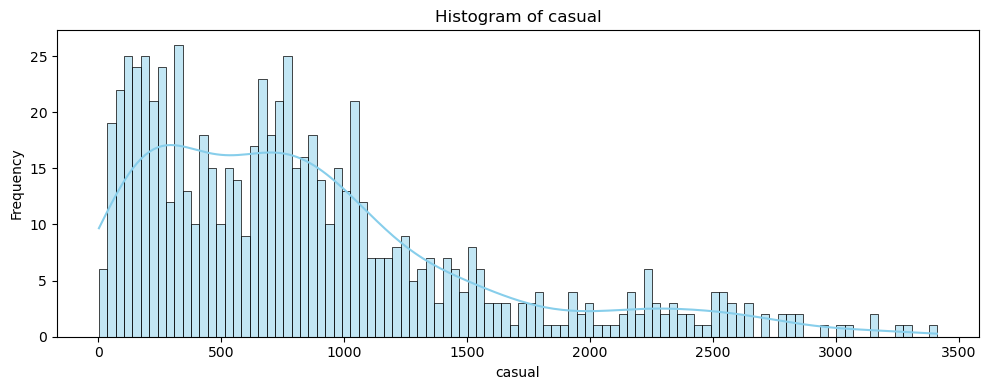

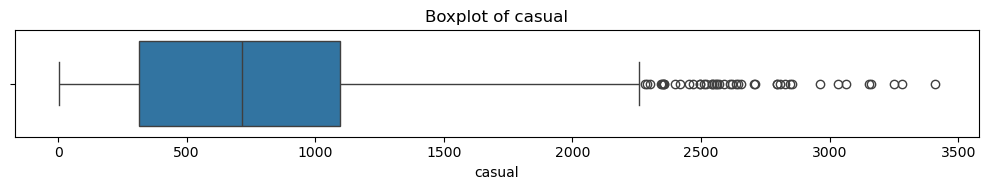

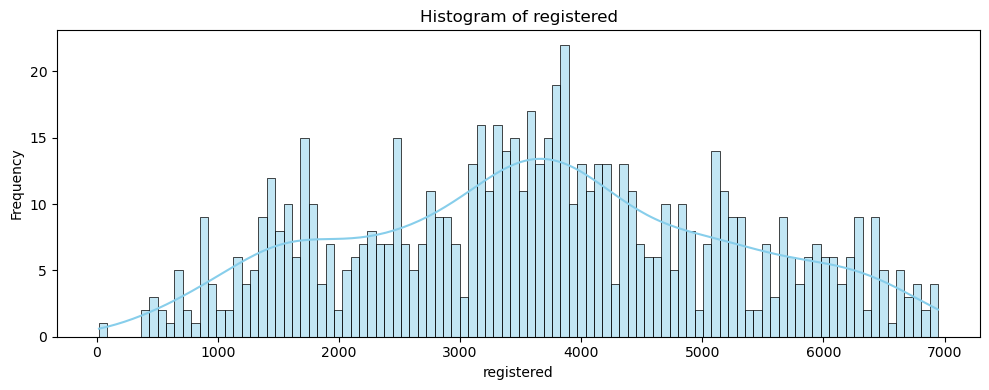

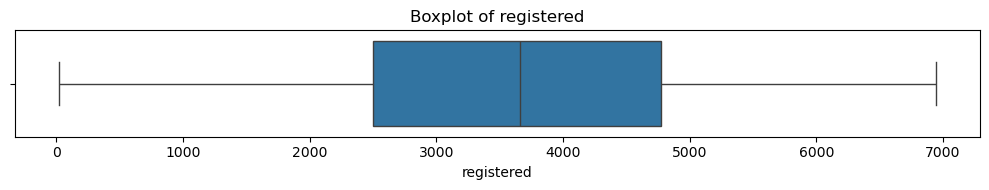

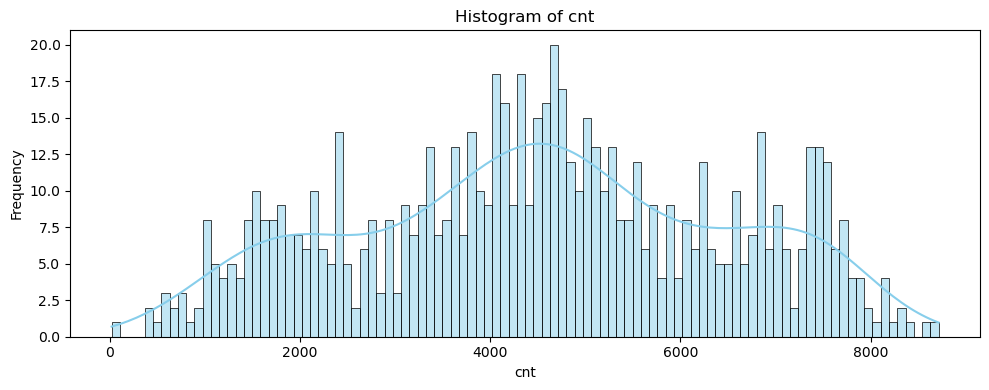

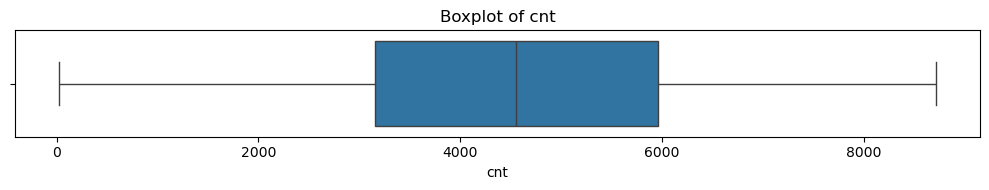

In [86]:
for col in df_day_class.columns:
    hist(df_day_class, col)
    box(df_day_class, col)

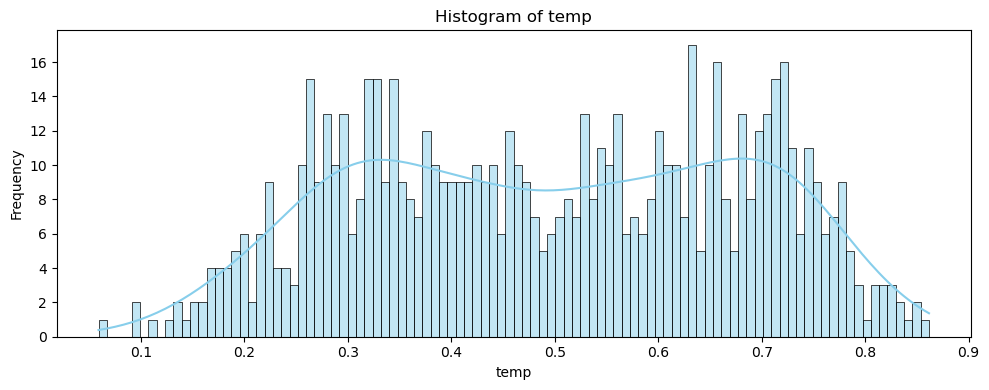

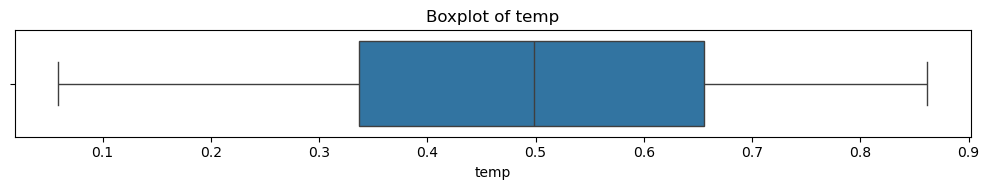

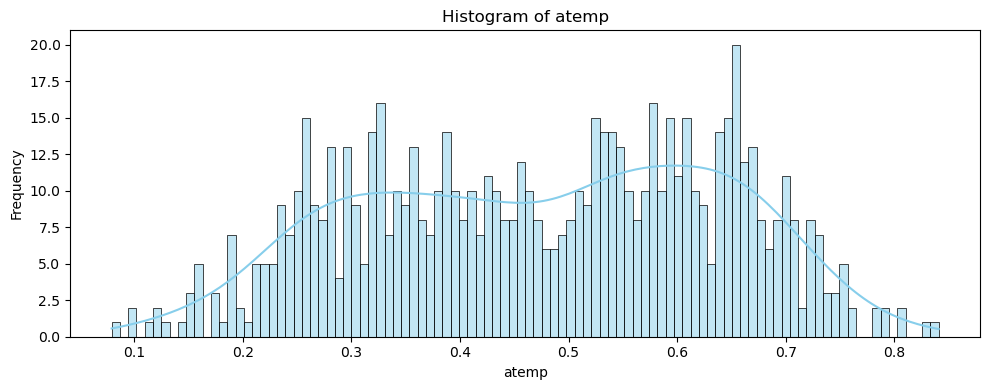

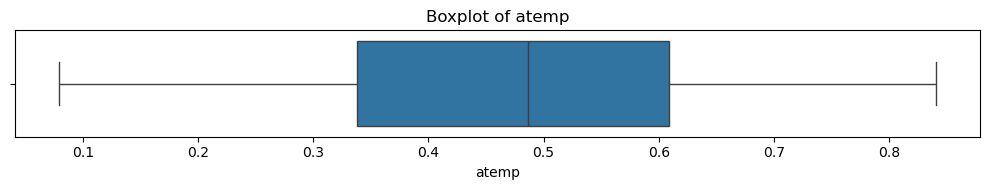

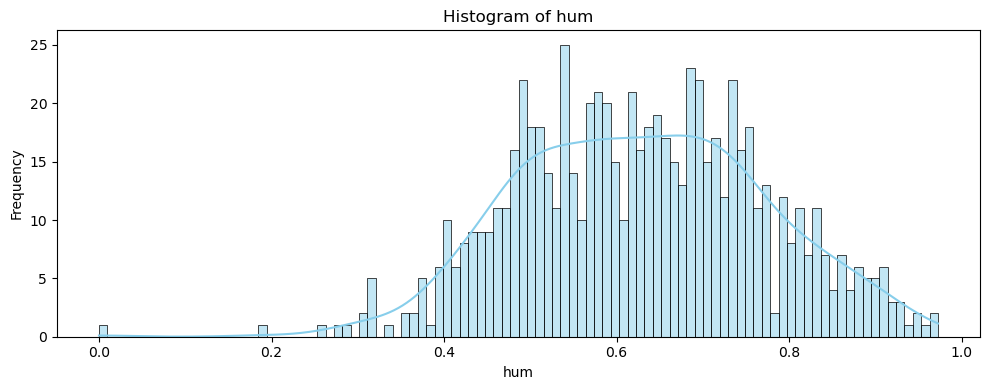

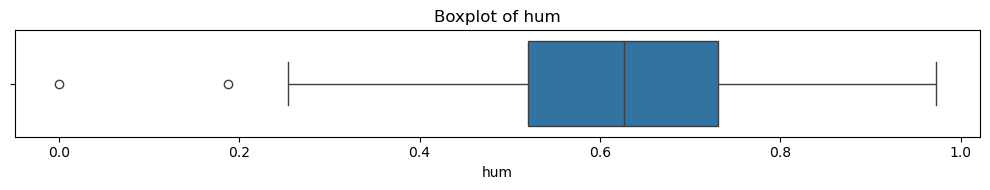

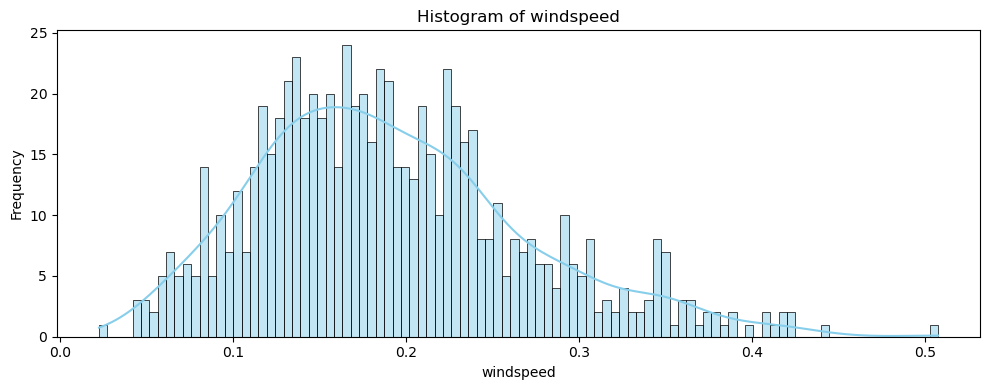

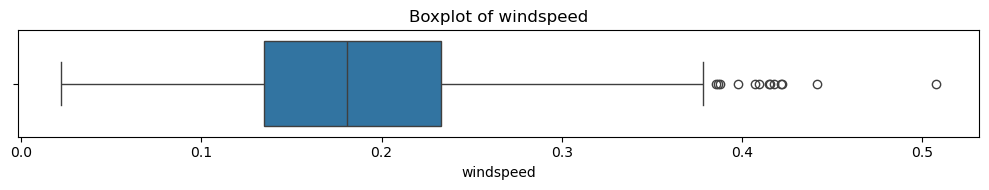

In [85]:
for col in df_day_cont.columns:
    hist(df_day_cont, col)
    box(df_day_cont, col)

#### Explore Data df_hour

In [89]:
df_hour_class = df_hour[['casual', 'registered', 'cnt']]

In [90]:
df_hour_cont = df_hour[['temp', 'atemp', 'hum', 'windspeed']]

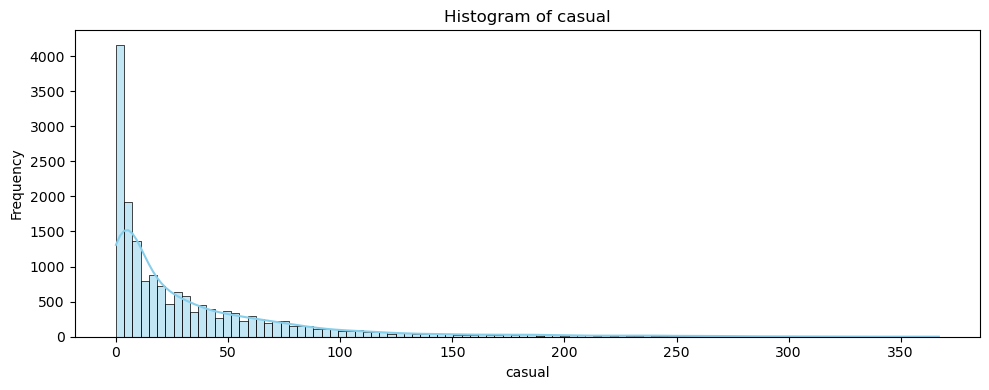

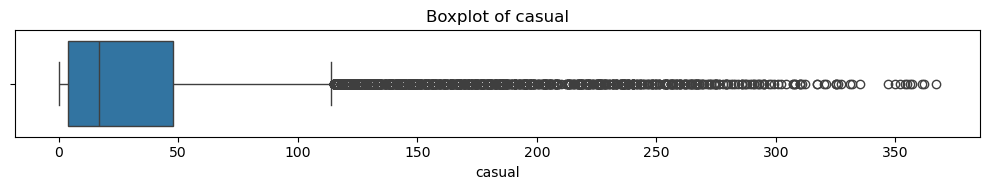

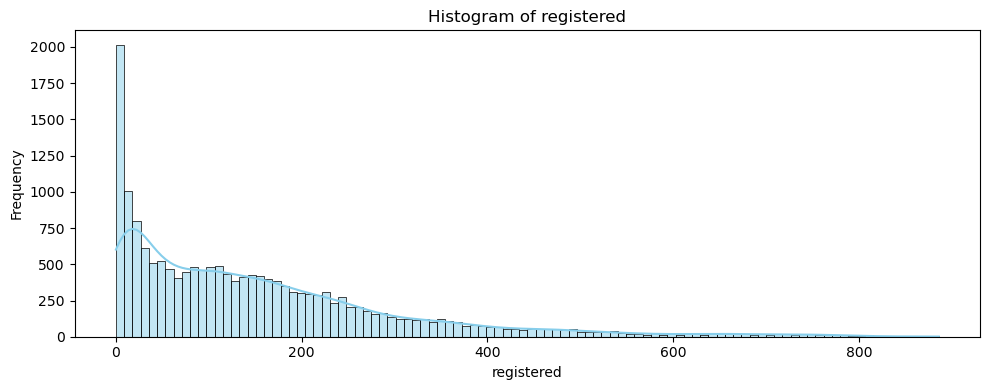

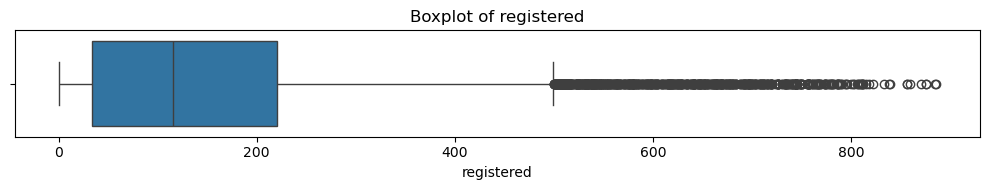

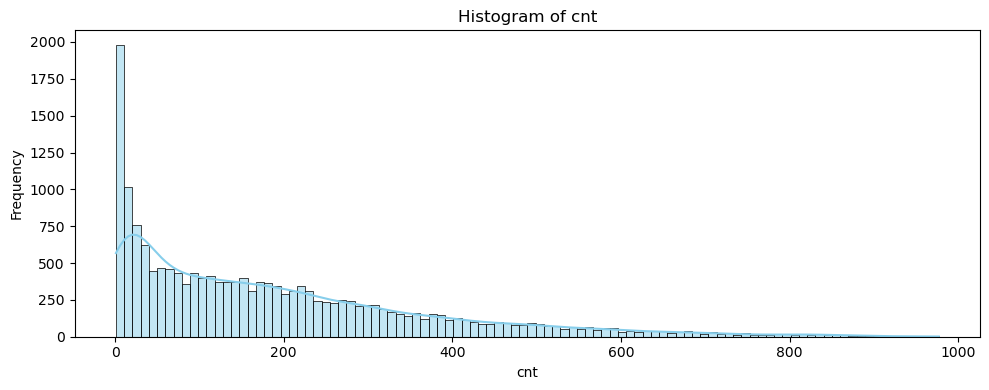

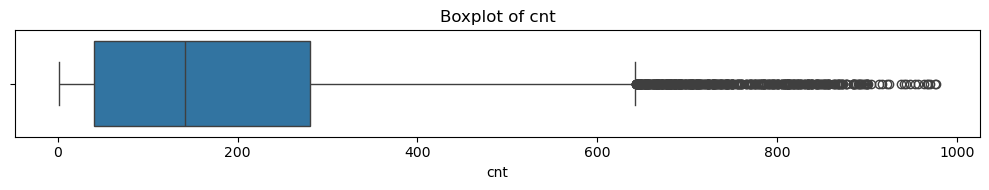

In [92]:
for col in df_hour_class.columns:
    hist(df_hour_class, col)
    box(df_hour_class, col)

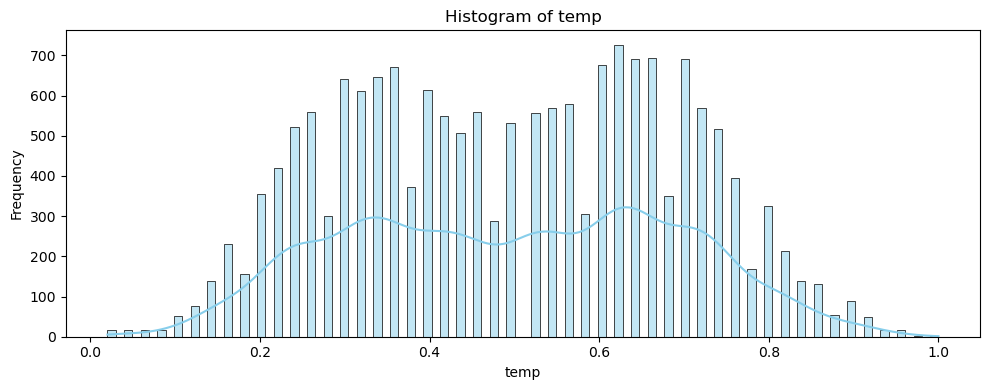

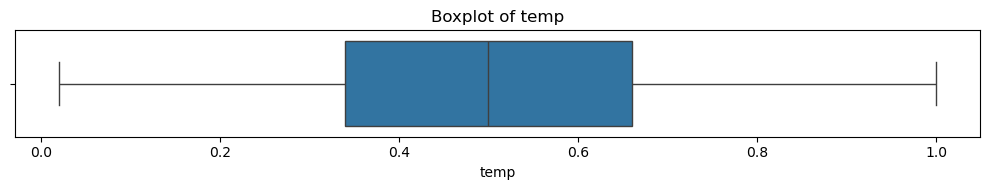

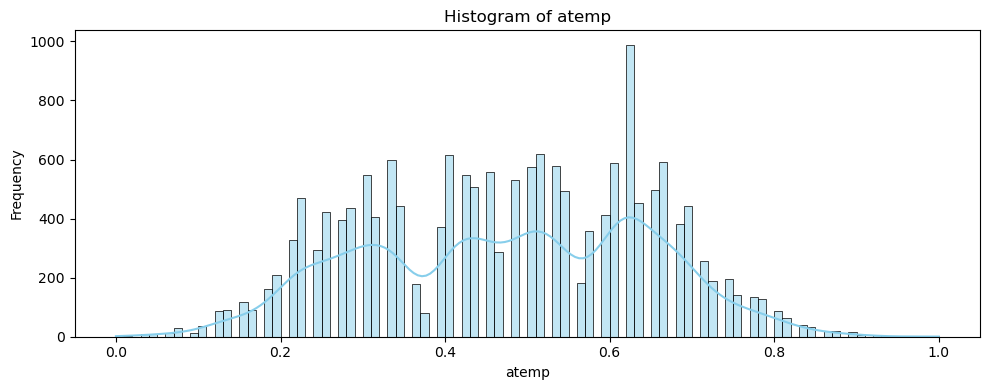

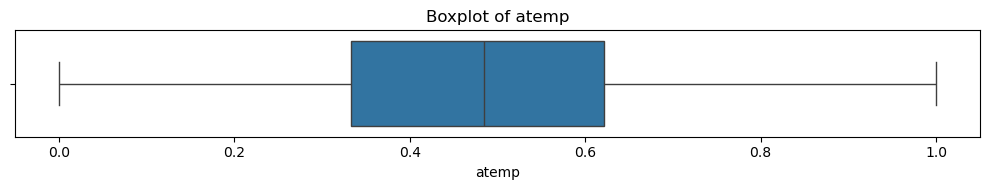

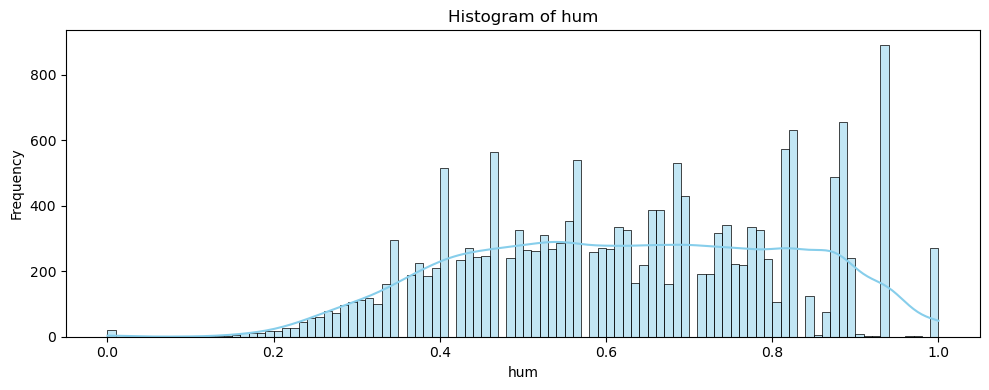

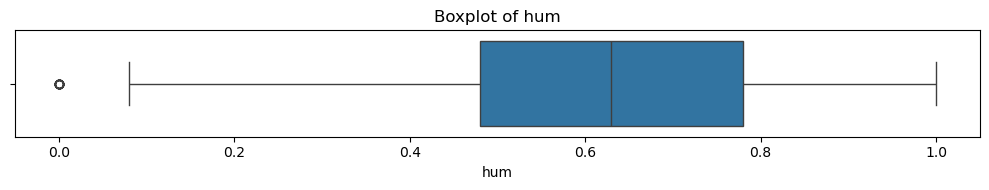

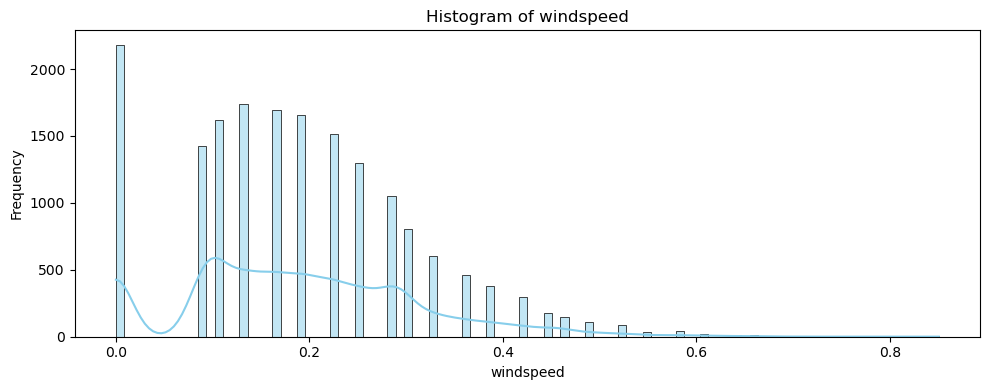

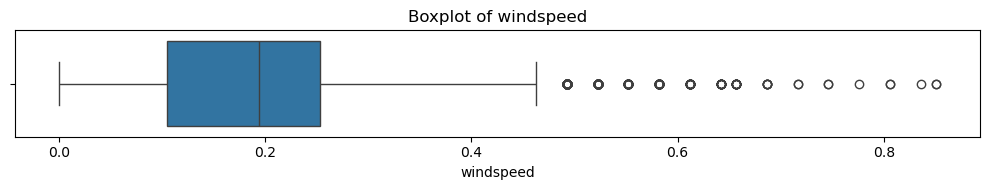

In [93]:
for col in df_hour_cont.columns:
    hist(df_hour_cont, col)
    box(df_hour_cont, col)

**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1:

- Bagaimana tren penyewaan sepeda sepanjang tahun? Apakah ada pola musiman?

In [ ]:
day_df.groupby(by="season").count_cr.sum().sort_values(ascending=False).reset_index().head(10)

In [ ]:


# melihat jumlah penyewaan tiap tahun berdasarkan registered dan casul 
day_df.groupby(by="year").agg({
    "registered": ["sum"],
    "casual": ["sum"]
})



### Pertanyaan 2:

- Pada jam berapa permintaan sepeda paling tinggi? Apakah berbeda antara hari kerja dan akhir pekan?

In [ ]:
# penyewaan berdasarkan jam
hour_df.groupby(by="hours").agg({
    "count_cr": ["sum"]
})


**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

### Pertanyaan 3:

- Apakah pengaruh cuaca menyebabkan penurunan dalam penyewaan?

In [ ]:
hour_df.groupby(by="weather_situation").count_cr.nunique().sort_values(ascending=False)

In [ ]:

2. RFM Analysis

RFM Analysis dibawah ini digunakan untuk memahami perilaku pelanggan dari tiga faktor utama:

    Recency (seberapa baru pelanggan berinteraksi dengan bisnis)
    Frequency (banyaknya pelanggan dalam berinteraksi)
    Monetary (banyaknya uang yang mereka gunakan)



In [ ]:


rfm_df = day.groupby(by="day", as_index=False).agg({
    "date": "max", # retrieve the date of the last order
    "instant": "nunique", # calculate the order quantity
    "total_user": "sum" # calculate the amount of revenue generated
})

rfm_df.columns = ["day", "max_order_timestamp", "frequency", "monetary"]

# calculates when the customer last made a transaction (days)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = day["date"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df

`

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2
- 